# Color Extraction for Testing

#### 1.Mean color of each cluster

(1500, 1500, 3)
image shape: (1500, 1500, 3)


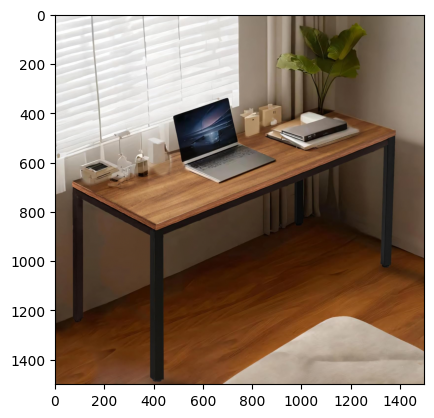

(2250000, 3)


c:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0 [0.40576866 0.26303944 0.15093284]
1 [0.9142728  0.91052728 0.90327402]
2 [0.70937969 0.65440275 0.59605803]
3 [0.19192835 0.11395418 0.05563855]
4 [0.58665215 0.4771139  0.37842902]


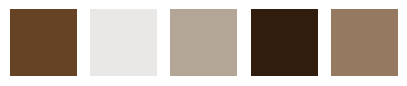

In [7]:
# mean color of each cluster
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
from matplotlib import image as mp_image
from matplotlib import pyplot as plt

def extract_colors(image_path, num_colors):
    # Load image
    image = mp_image.imread(image_path)
    # print("image:", image)
    print(image.shape)
    image = image / 255.0  # normalize to [0,1]
    print("image shape:", image.shape)
    plt.imshow(image)
    # plt.axis('off')
    plt.show()

    # Reshape the image to be a list of pixels
    pixels = image.reshape(-1, 3)
    print(pixels.shape)
    
    # Use KMeans to find main colors
    model = KMeans(n_clusters=num_colors)
    model.fit(pixels)
    
    # Get the colors
    colors = model.cluster_centers_
    
    # Display the colors
    plt.figure(figsize=(num_colors, 2))
    for i, color in enumerate(colors):
        print(i,color)
        plt.subplot(1, num_colors, i+1)
        plt.imshow([[color]])
        plt.axis('off')
    plt.show()
    
    
    return colors

# Use the function
image_path = r'C:\Users\user\amazon\Detection\team5\Color_Extraction\test_images\AAIRLLENSleekandSturdyInchComputerDeskPerfectforWorkandStudyMultiPurposeTableforWritingDiningandWorkstation.jpg'
colors = extract_colors(image_path, num_colors=5)


#### 2.Frequency of each cluster

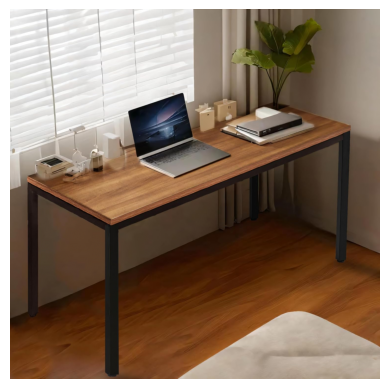

c:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


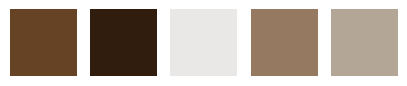

Ordered Dominant Colors:
 [[0.40573722 0.26301645 0.15091309]
 [0.19192789 0.11395341 0.05563787]
 [0.9142728  0.91052728 0.90327402]
 [0.58660399 0.47700598 0.37829182]
 [0.70933304 0.65435035 0.59599905]]
Percentage of each color (rounded):
 [33.63 24.64 15.72 14.02 11.98]


In [11]:
# 2.Frequency of each cluster
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import image as mp_image
from matplotlib import pyplot as plt

def extract_ordered_dominant_colors(image_path, num_colors):
    # Load and normalize image
    image = mp_image.imread(image_path) / 255.0
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Reshape the image to be a list of pixels
    pixels = image.reshape(-1, 3)
    
    # Use KMeans to find main colors
    model = KMeans(n_clusters=num_colors)
    model.fit(pixels)
    
    # Get the colors and labels
    colors = model.cluster_centers_
    labels = model.labels_
    
    # Count labels to find the frequency of each cluster
    count_labels = np.bincount(labels)
    total_pixels = len(pixels)
    
    # Calculate the percentage of each cluster
    percentages = 100 * count_labels / total_pixels
    percentages_rounded = np.round(percentages, 2)  # Round to 2 decimal places
    
    # Order the clusters by their frequency (most common first)
    ordered_indices = np.argsort(count_labels)[::-1]  # Descending order
    ordered_colors = colors[ordered_indices]
    ordered_percentages = percentages_rounded[ordered_indices]
    
    # Display the ordered dominant colors
    plt.figure(figsize=(num_colors, 2))
    for i, color in enumerate(ordered_colors):
        plt.subplot(1, num_colors, i+1)
        plt.imshow([[color]])
        plt.axis('off')
    plt.show()
    
    return ordered_colors, ordered_percentages

# Use the function
image_path = r'C:\Users\user\amazon\Detection\team5\Color_Extraction\test_images\AAIRLLENSleekandSturdyInchComputerDeskPerfectforWorkandStudyMultiPurposeTableforWritingDiningandWorkstation.jpg'
num_colors = 5

ordered_dominant_colors, ordered_percentages = extract_ordered_dominant_colors(image_path, num_colors)

print("Ordered Dominant Colors:\n", ordered_dominant_colors)
print("Percentage of each color (rounded):\n", ordered_percentages)


#### 3.Top frequency of each cluster

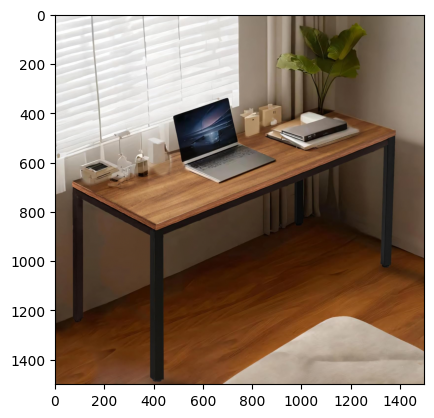

c:\Users\user\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


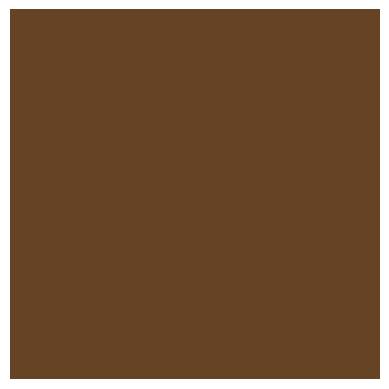

Dominant Color: [0.40573722 0.26301645 0.15091309]


In [10]:
# Top frequency of each cluster(just one color)
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import image as mp_image
from matplotlib import pyplot as plt

def extract_dominant_color(image_path, num_colors):
    # Load and normalize image
    image = mp_image.imread(image_path) / 255.0
    plt.imshow(image)
    plt.show()

    # Reshape the image to be a list of pixels
    pixels = image.reshape(-1, 3)
    
    # Use KMeans to find main colors
    model = KMeans(n_clusters=num_colors)
    model.fit(pixels)
    
    # Get the colors and labels
    colors = model.cluster_centers_
    labels = model.labels_
    
    # Count labels to find most common cluster
    count_labels = np.bincount(labels)
    most_common_cluster = np.argmax(count_labels)
    
    dominant_color = colors[most_common_cluster]
    
    # Display the dominant color
    plt.imshow([[dominant_color]])
    plt.axis('off')
    plt.show()
    
    return dominant_color

# Use the function
image_path = r'C:\Users\user\amazon\Detection\team5\Color_Extraction\test_images\AAIRLLENSleekandSturdyInchComputerDeskPerfectforWorkandStudyMultiPurposeTableforWritingDiningandWorkstation.jpg'
dominant_color = extract_dominant_color(image_path, num_colors=5)
print("Dominant Color:", dominant_color)
